In [1]:
from __future__ import unicode_literals
#from gensim.summarization import keywords
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
import pdb
import string
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
import unicodedata
!pip install sumy
import re

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 41.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=8739d16c7bf2e8ff3bebf6a6c3ec278622ce0f19aea1542555491dce7d5b11ce
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=d2e3e80f66057f7ba34415510a2892d6d7da6a8912e52ab2acd4739d7a76477b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=1068

In [2]:

df_resumes=pd.read_excel('./Resume.xlsx')
df_job=pd.read_excel('./Job Descriptions.xlsx')

df_resumes=df_resumes[['Category','Resume','Set']]
print(df_resumes)
df_job=df_job[['Category','Job Description','Set']]
print(df_job)

               Category                                             Resume  \
0          Data Science  Skills:\n•        Programming Languages: Pytho...   
1          Data Science  Objective: To obtain a challenging position in...   
2          Data Science  Skills:\n•\tR\n•\tPython\n•\tSAP HANA Tableau\...   
3          Data Science  Skills:\n•\tC Basics\n•\tIOT\n•\tPython\n•\tMA...   
4          Data Science  Skills:\n•\tPython\n•\tTableau\n•\tData Visual...   
5          Data Science  Personal Skills:\n•\tAbility to quickly grasp ...   
6          Data Science  Skills:\n•\tPython\n•\tTableau\n•\tData Visual...   
7          Data Science  Personal Skills:\n•\tAbility to quickly grasp ...   
8          Data Science  Skills:\n•\tProgramming Languages: Python, pan...   
9          Data Science  Objective: To obtain a challenging position in...   
10    Operation Manager  Education:\n•\tBCA, Vinayaka Missions Universi...   
11    Operation Manager  Key Competencies:\n•\tMulti Operations 

In [3]:

!pip install wget


import wget

wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",out="helper_prabowo_ml.py")

from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords, remove_, remove_digits, lower, email_address, non_ascii, punct


def text_preprocess(data,col):
    data[col] = data[col].apply(func=clean_html)
    #data[col] = data[col].apply(func=remove_)
    #data[col] = data[col].apply(func=removeStopWords)
    #data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    #data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=email_address)
    #data[col] = data[col].apply(func=lower)
    return data

df_resumes = text_preprocess(df_resumes,'Resume')
df_job = text_preprocess(df_job,'Job Description')

# export the DataFrame to a CSV file
df_resumes.to_csv('CleanedResume.csv', index=False)
df_job.to_csv('CleanedJob.csv', index=False)

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=a9ab02d8ff6af96d1907b15a53ab97c4a0a259947b3495ff61af66b57251dcca
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")
def chunks_sent(text):

    doc = nlp(text)
    # Extract the noun phrases from the sentence
    noun_phrases = [chunk.text for chunk in doc.noun_chunks]

    # Print the noun phrases
    #print(noun_phrases)
    return noun_phrases


df_resumes['Chunks'] = df_resumes['Resume'].apply(chunks_sent)
df_job['Chunks'] = df_job['Job Description'].apply(chunks_sent)

In [5]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.9 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=aaf79e2b053b298aa78da0a90f75cd63289e0616433165f2f359587540638460
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [6]:
model_names=['bert-base-nli-mean-tokens','roberta-base-nli-mean-tokens','distilbert-base-nli-mean-tokens']

In [7]:
#Get the sentence Embeddings

def getsentenceEmbeddings(textlist):
  model = 'roberta-base-nli-mean-tokens'
  model = SentenceTransformer(model)
  sentence_embeddings = model.encode(textlist)
  return sentence_embeddings

In [8]:
df_resumes['Embeddings'] = df_resumes['Resume'].apply(getsentenceEmbeddings)
df_job['Embeddings'] = df_job['Job Description'].apply(getsentenceEmbeddings)


In [9]:
import pandas as pd

# create an empty DataFrame with two columns: "name" and "age"
df = pd.DataFrame(columns=['Resume', 'JD','Similarity'])

# display the resulting DataFrame
print(df)

Empty DataFrame
Columns: [Resume, JD, Similarity]
Index: []


In [10]:
count=0
for i in range(len(df_job['Job Description'])):
  #print(df_job['Category'][i])
  #print("Resume")
  for j in range(len(df_resumes['Resume'])):
    if(df_job['Category'][i] == df_resumes['Category'][j]):
      val = cosine_similarity([df_job['Embeddings'][i]],[df_resumes['Embeddings'][j]])
      similarity = round(val[0, 0], 2)
      #print(df_resumes['Category'][j])
      df.loc[len(df)] = [df_resumes['Set'][j], df_job['Set'][i],similarity]
      count=count+1
  print(count)


10
20
30
40
50
60
70
80
90
100


In [11]:
df

,Resume,JD,Similarity
0,HF1,JDHF1,0.66
1,HF2,JDHF1,0.66
2,HF3,JDHF1,0.58
3,HF4,JDHF1,0.60
4,HF5,JDHF1,0.58
...,...,...,...
95,OM6,JDOM2,0.56
96,OM7,JDOM2,0.42
97,OM8,JDOM2,0.53
98,OM9,JDOM2,0.76


In [12]:
# export the DataFrame to a CSV file
df.to_csv('Similarity_JD_Resumes.csv', index=False)

<ipython-input-13-9562892dc39d>:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_coords[i], y_coords[i], c=jd_colors[list(jd_colors.keys())[i]], label=list(jd_colors.keys())[i])


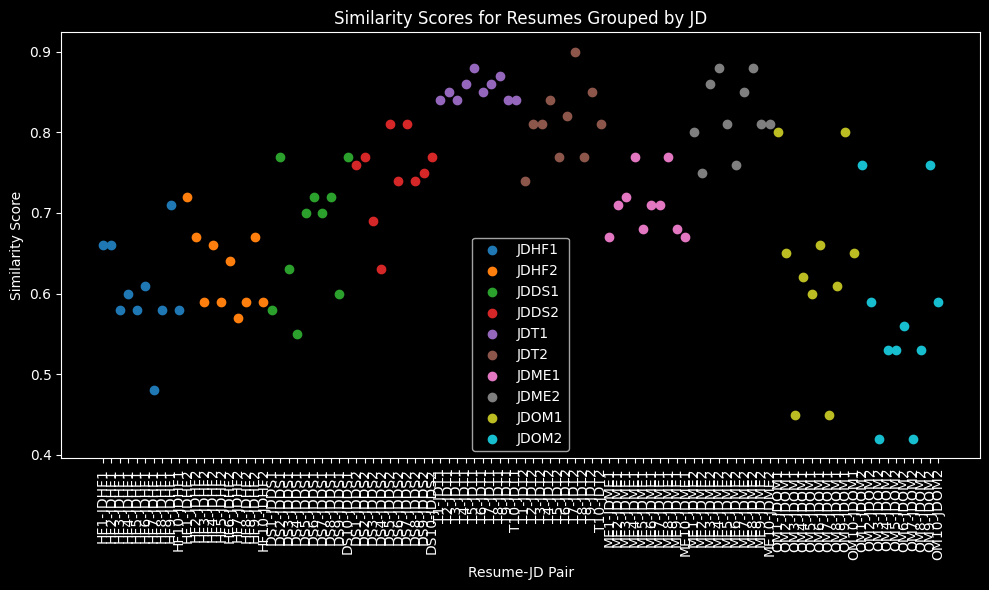

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# Set the style to use a black background
style.use('dark_background')

# Read the data from the CSV file
data = pd.read_csv('Similarity_JD_Resumes.csv')

# Get unique JDs and assign colors
unique_jds = data['JD'].unique()
jd_colors = dict(zip(unique_jds, plt.cm.tab10.colors[:len(unique_jds)]))

# Create lists to store the x and y coordinates for each JD
x_coords = [[] for _ in jd_colors]
y_coords = [[] for _ in jd_colors]

# Populate the coordinates based on JD
for idx, row in data.iterrows():
    jd = row['JD']
    x_coords[list(jd_colors.keys()).index(jd)].append(idx)
    y_coords[list(jd_colors.keys()).index(jd)].append(row['Similarity'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color to black
fig.patch.set_facecolor('black')

# Plot each JD group separately
for i in range(len(jd_colors)):
    ax.scatter(x_coords[i], y_coords[i], c=jd_colors[list(jd_colors.keys())[i]], label=list(jd_colors.keys())[i])

# Set labels and title
ax.set_xlabel('Resume-JD Pair')
ax.set_ylabel('Similarity Score')
ax.set_title('Similarity Scores for Resumes Grouped by JD')

# Set x-axis ticks and labels
ax.set_xticks(range(len(data)))
ax.set_xticklabels([f'{row["Resume"]}-{row["JD"]}' for _, row in data.iterrows()], rotation=90)

# Set the text color to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Set the tick colors to white
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the legend text color to white
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('white')

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
print(df_job)
print(df_resumes)

# export the DataFrame to a CSV file
df_resumes.to_csv('CleanedResume_Embeddings.csv', index=False)
df_job.to_csv('CleanedJob_Embeddings.csv', index=False)

              Category                                    Job Description  \
0     Health & Fitness  Job Description 1: Health and Wellness Program...   
1     Health & Fitness  Job Description 2: Fitness Service Manager\n\n...   
2         Data Science  Job Description 3: Data Scientist  Product Ana...   
3         Data Science  Job Description 4: Quantitative Analyst\nRequi...   
4              Testing  Job Description 5: QA Manual Tester 100 Remote...   
5              Testing  Job Description 6: QA Engineer\nResponsibiliti...   
6  Mechanical Engineer  Job Description 7: Mechanical Engineer  Motivo...   
7  Mechanical Engineer  Job Description 8: Mechanical Engineer  Convey...   
8    Operation Manager  job Description 9: Operation Management \nResp...   
9    Operation Manager  Job Description 10: Operations Manager\nRespon...   

     Set                                             Chunks  \
0  JDHF1  [Health and Wellness Program Coordinator, Seni...   
1  JDHF2  [Fitness Service

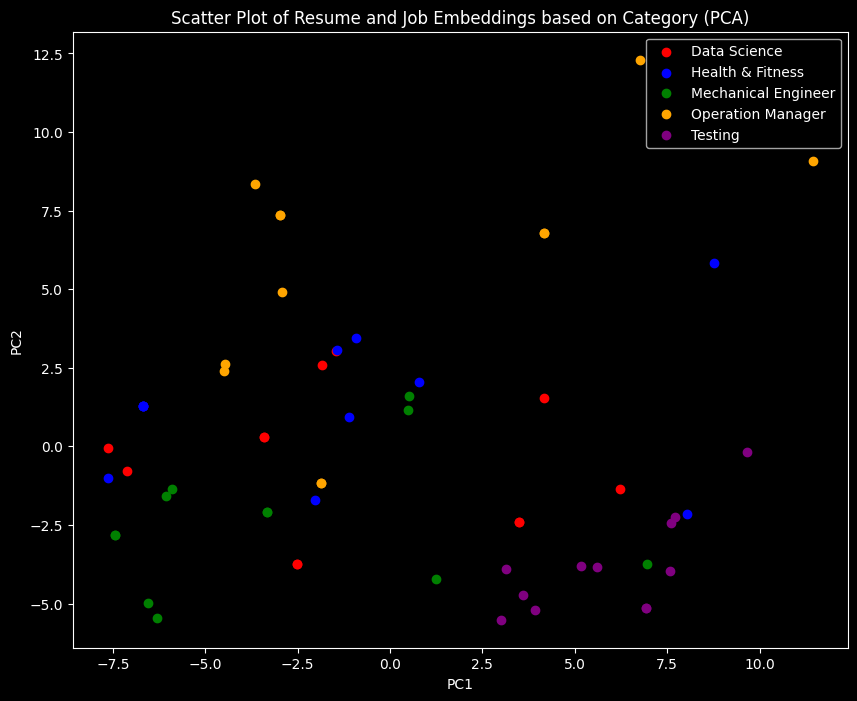

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Read the CSV files
df_resume = pd.read_csv('./CleanedResume_Embeddings.csv')
df_job = pd.read_csv('./CleanedJob_Embeddings.csv')

# Preprocess the embedding values
df_resume['Embeddings'] = df_resume['Embeddings'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
df_job['Embeddings'] = df_job['Embeddings'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

# Extract the relevant columns
resume_embeddings = np.array(df_resume['Embeddings'].tolist())
resume_categories = df_resume['Category'].tolist()
resume_set = df_resume['Set'].tolist()
job_embeddings = np.array(df_job['Embeddings'].tolist())
job_categories = df_job['Category'].tolist()
job_set = df_job['Set'].tolist()

# Combine resume and job embeddings and categories
embeddings = np.concatenate((resume_embeddings, job_embeddings), axis=0)
categories = resume_categories + job_categories
sets = resume_set + job_set

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Create a DataFrame for the PCA embeddings
df_pca = pd.DataFrame(embeddings_pca, columns=['PC1', 'PC2'])
df_pca['Category'] = categories
df_pca['Set'] = sets


# Plot the scatter plot
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Customize the colors as needed

category_groups = df_pca.groupby('Category')
category_list = list(category_groups.groups.keys())

for category, group in category_groups:
    color = colors[category_list.index(category) % len(colors)]
    plt.scatter(group['PC1'], group['PC2'], color=color, label=category)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of Resume and Job Embeddings based on Category (PCA)')
plt.legend()
plt.show()

In [16]:
# Define the ranks of the resumes in Set 1 and Set 2
set1_ranks = [1, 2, 3, 4, 5]
set2_ranks = [1, 2, 3, 4, 5]

# Define the names of the resumes in Set 1 and Set 2
set1_resumes = ['2', '3', '7', '5', '9']
set2_resumes = ['2', '3', '6', '5', '10']

# Define a variable to count the number of matching elements
num_matches = 0

# Compare the ranks of each element in Set 1 to its corresponding rank in Set 2
for i in range(len(set1_ranks)):
    if set1_resumes[i] == set2_resumes[i]:
        num_matches += 1

# Calculate the accuracy
accuracy = num_matches / len(set1_ranks)

# Print the accuracy and the resumes in ascending order
print("Accuracy: {:.0%}".format(accuracy))



Accuracy: 60%
